# **Plant Seedlings Classification CNN**
 
 **By: Neil Shah**


## **Introduction**<br>
This is an 8-layer convolutional neural network model for recognizing 12 different plant seedlings from images at various stages of growth. I used Keras, a high-level neural networks library, with the TensorFlow backend. I achieved 92.695% accuracy in 5 hours of training for 75 epochs. I trained my CNN on Jupyter Notebook and loaded the model by creating a new dataset. I am still making changes to my model to improve the accuracy. The notebook has 3 main parts:
* Data  Preparation
* CNN model and evaluation
* Predictions and Submission


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [68]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
scale=70
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

#K.set_image_dim_ordering( 'tf' )

In [74]:
import os
os.chdir('C:/Users/atq765/My Drive/PG-AIML/Computer Vision')

In [82]:
species = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen',
          'Loose Silky-bent', 'Maize','Scentless Mayweed', 'Shepherds Purse',
          'Small-flowered Cranesbill', 'Sugar beet']
data_dir = 'C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')       


NameError: name 'cwd' is not defined

In [83]:
# Organize training files into DataFrame
train_data = []
for species_id, sp in enumerate(species):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['train/{}/{}'.format(sp, file), species_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'SpeciesId','Species'])
train.head()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/train\\Black-grass'

In [ ]:
# Organize training files into DataFrame
train_data = []
for species_id, sp in enumerate(species):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['train/{}/{}'.format(sp, file), species_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'SpeciesId','Species'])
train.head()

In [39]:
ls "C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/"

 Volume in drive C is OSDisk
 Volume Serial Number is 1016-95DA

 Directory of C:\Users\atq765\My Drive\PG-AIML\Computer Vision\plant-seedlings-classification

07/11/2022  10:02 AM    <DIR>          .
07/11/2022  10:02 AM    <DIR>          ..
07/09/2022  10:52 PM       233,472,128 images.npy
07/09/2022  10:52 PM            68,874 Labels.csv
07/11/2022  01:11 AM        13,368,912 my_model.hdf5
07/11/2022  10:02 AM    <DIR>          test
07/11/2022  10:01 AM    <DIR>          train
               3 File(s)    246,909,914 bytes
               4 Dir(s)  245,723,230,208 bytes free


In [45]:
pathToTrain = "C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/train"
testPath = "C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/test"

## **Data Preparation**
### **Load the data**

In [67]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [73]:
path_to_images = "C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/pny"
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='r')
    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
    traininglabels.append(i.split('/')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

In [ ]:
species = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen',
          'Loose Silky-bent', 'Maize','Scentless Mayweed', 'Shepherds Purse',
          'Small-flowered Cranesbill', 'Sugar beet']
data_dir = '../input/plant-seedlings-classification/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

IndexError: index 0 is out of bounds for axis 0 with size 0

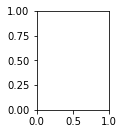

In [72]:
new_train = []
sets = []; getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)
# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])


In [66]:
listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/train/"+"images"+ "/"
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath =cv2.imread(path+"images.npy")
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (71,71))) # images
    
t1=time.time()
print(t1-t0," seconds")

1
images


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/plants/train/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

NameError: name 'path' is not defined

In [51]:
trainImagesPaths[1]

IndexError: list index out of range

In [34]:
species = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen',
          'Loose Silky-bent', 'Maize','Scentless Mayweed', 'Shepherds Purse',
          'Small-flowered Cranesbill', 'Sugar beet']
data_dir = 'C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [35]:
species

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

SyntaxError: invalid syntax (3984238628.py, line 1)

In [36]:
# Organize training files into DataFrame
train_data = []
for species_id, sp in enumerate(species):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['train/{}/{}'.format(sp, file), species_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'SpeciesId','Species'])
train.head()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/atq765/My Drive/PG-AIML/Computer Vision/plant-seedlings-classification/train\\Black-grass'

In [21]:
# Randomize the order of training set
SEED = 42
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reset indices
train.head()

NameError: name 'train' is not defined

In [ ]:
# Plot a histogram
plt.hist(train['SpeciesId'])
plt.title('Frequency Histogram of Species')
plt.figure(figsize=(12, 12))
plt.show()

The histogram shows that there is a large range in the number of training samples for each of the species. If we decided to stratify the training set by evenly distributing the number of samples per species (~ 200), then we would be omitting a large amount of potentially useful training data. For that reason, I won't perform stratification, but it's something to consider for future improvements. 

In [ ]:
# Organize test files into DataFrame
test_data = []
for file in os.listdir(test_dir):
    test_data.append(['test/{}'.format(file), file])
test = pd.DataFrame(test_data, columns=['Filepath', 'File'])
test.head()

### **Plot training images**

In [ ]:
# Display images for different species
def plot_species(species, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    species_files = train['File'][train['Species'] == species].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, species_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_species('Black-grass', 5, 5)

### **Image preprocessing**
I must extend credit to Gábor Vecsei's [Plant Seedlings Fun with Computer Vision](https://www.kaggle.com/gaborvecsei/plant-seedlings-fun-with-computer-vision) for helping me to understand and implement image preprocessing techniques. I wrote functions for reading a BGR image and resizing the image. For resizing the image, I used the INTER_AREA interpolation method, which resamples using pixel area relation. It's the preferred interpolation method for image decimation because it provides moiré-free (non-wavy) results. 


In [ ]:
IMAGE_SIZE = 66

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

There are many different types of image segmentation. I will use the most basic type called thresholding. It is a non-linear operation converts an image into a binary images where the two levels are assigned pixels based on whether they're above or below the specified threshold value. <br><br>
First, I will convert from the BGR to the HSV color-space which will be useful for extracting green-colored objects. In HSV, the hue of a color refers to the pure color it resembles and the value represents the brightness. The saturation describes the shade of the color, such as pink and salmon representing different types of the red. 
![](http://www.nmt.edu/tcc/help/pubs/colortheory/img/cone.png)
Source: http://infohost.nmt.edu/tcc/help/pubs/colortheory/web/hsv.html<br>

After making the color-space conversion, we threshold the HSV image for a range of green color. Another technique we can apply is a morphological transformation. I used the closing transformation because it's useful for closing small holes in the objects. In doing this, we have to specify a structural element or kernel which slides through the image applying transformations on the specified window size. <br><br>
Finally, I extract the green objects alone by performing a bitwise-AND operation between the mask and the original image.


In [ ]:
# Image segmentation
def create_mask(image):
    # Convert from BGR to HSV color-space to extract colored object
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # Define range of green in HSV
    lower_green = np.array([30, 100, 50])
    upper_green = np.array([85, 255, 255])
    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(image_hsv, lower_green, upper_green)
    # We will use a morphological operation called closing to close small holes in the image
    # We need a kernel or structuring element to determine the nature of the operation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    return mask

def segment_image(image):
    mask = create_mask(image)
    res = cv2.bitwise_and(image, image, mask=mask) # Bitwise-AND mask and original image
    return res

### **Plot segmented images**<br>
We can show a side-by-side comparison of the original, masked, segmented, and resized images.

In [ ]:
def show_segmented_images(species, n):
    fig, ax = plt.subplots(n, 4, figsize=(20, 20))
    species_files = train['File'][train['Species'] == species].values
    for i in range(n):
        image = read_image(species_files[i])
        image_masked = create_mask(image)
        image_segmented = segment_image(image)
        image_resized = resize_image(image_segmented, (IMAGE_SIZE, IMAGE_SIZE))
        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
        ax[i, 2].set_axis_off()
        ax[i, 3].set_axis_off()
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(image_masked)
        ax[i, 2].imshow(image_segmented)
        ax[i, 3].imshow(image_resized)
# Displays first n images of class from training set
show_segmented_images('Maize', 3)

### **Extract features**
Since the image sizes vary, I reshaped all of the images to 66x66x3. Keras requires an extra dimension which corresponds to the channels. For RGB images, there are 3 channels. I also performed normalization to help the CNN converge faster. Note that we resize the image after segmentation to reduce the noise.

In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    image_segmented = segment_image(image)
    X_train[i] = resize_image(image_segmented, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
X_train = X_train / 255.
print('Train Shape: {}'.format(X_train.shape))

### **Label encoding**
We encode the labels to one-hot vectors. The integer encoding (0-11) is removed and a new binary value is added for each integer value.

In [ ]:
Y_train = train['SpeciesId'].values
Y_train = to_categorical(Y_train, num_classes=12)

### **Split training and validation set**

In [ ]:
BATCH_SIZE = 16
EPOCHS = 75

# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=SEED)

I chose to split 90% of the data into a training group and the remaining 10% into a validation group for evaluating the model's performance.<br><br><br>

We can get a better sense of the training samples by looking at some images with the known labels which are shown in the title.

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 15))
for i in range(4):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(species[np.argmax(Y_train[i])])

## **CNN model and evaluation**<br>

### **Model Architecture**
The Sequential model is a linear stack of layers. The first layer in the model needs to receive information about its input shape and the following layers will do automatic shape reference. The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters.  During the forward pass, each filter is convolved across the image to produce a 2D activation map of each filter. Then stacking the activation maps for each filter forms the full output of the convolutional layer. The Batch normalization layer normalizes the activations of the convolutional layers by applying a transformation that maintains the mean close to 0 and the standard deviation close to 1.  The max pooling layer serves as a form of non-linear downsampling. In this case, the 2x2 filters compute the maximum value of four pixels and make a stride of 2 pixels (width and height) at each depth. There are a total of 6 convolutional layers and 3 max pooling layers. The flatten layer is used to convert the final feature map into a 1D vector, combining all of the features of the previous layer. In the final layer, I used softmax activation so the neural network outputs the probability distribution for each class.

For the convolutional and dense layers, I used the ReLU activation function. For training deep neural networks, ReLU is more effective than the sigmoid and tangent activation functions because it prevents gradients from saturating. The vanishing gradient problem causes the neural network to get stuck preventing meaningful learning from taking place.

Before training the model, we need to configure the learning process by specifying the optimizer, loss function, and list of metrics. The loss function measures the error rate between the model's predicted and observed labels. The categorical crossentropy loss function is computed by taking the average of all cross-entropies in the sample. It will measure the probability that the training sample belongs to an individual class. The cost function is the average of the loss function over a large number of training samples. The goal of the optimization algorithm is to minimize the cost function by iteratively updating the weights and biases. I used the Adam (short for Adaptive Moment Estimation) optimizer because it's effective and achieves good results quickly. For information about how the optimizer works, [click here](https://arxiv.org/abs/1412.6980).

In [ ]:
def construct_model():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                activation='relu'))
    model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten()) # Flatten the input
    model.add(Dense(256, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    # Configure the learning process
    # The loss function is the objective that the model will try to minimize
    # For any classification problem, use accuracy metric
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    model.summary()
    return model

### **Training the CNN**

ReduceLROnPlateau reduces the learning rate when the validation accuracy has stopped improving. Models often benefit from reducing the learning rate by a factor of 2 to 10 once learning stagnates. My annealer reduces the learning rate by 50% when the validation accuracy hasn't increased for 5 epochs. Reducing the learning rate allows the optimizer to take smaller steps to reach the global minimum, which increases the rate of convergence. 

The ImageDataGenerator is a data augmentation technique that works by applying small transformations to the training samples to generate additional data. This makes the existing training dataset larger. For example, the training images may be rotated by a certain number of degrees or zoomed in by a small percentage. There can also be random horizontal and vertical shifts, ZCA whitening, mean and standard deviation normalization, etc. 

I trained the model for 75 epochs, although the training and validation accuracies only made miniscule improvements after 55 epochs. 


In [ ]:
def train_model():
    model = construct_model()
    annealer = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=5, verbose=1, min_lr=1e-5)
    checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
    # Generates batches of image data with data augmentation
    datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                            width_shift_range=0.2, # Range for random horizontal shifts
                            height_shift_range=0.2, # Range for random vertical shifts
                            zoom_range=0.2, # Range for random zoom
                            horizontal_flip=True, # Randomly flip inputs horizontally
                            vertical_flip=True) # Randomly flip inputs vertically
    
    datagen.fit(X_train)
    # Fits the model on batches with real-time data augmentation
    hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                   steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
                   epochs=EPOCHS,
                   verbose=2,
                   callbacks=[annealer, checkpoint],
                   validation_data=(X_val, Y_val))
# train_model()

### **Model evaluation**

In [ ]:
final_model = load_model('../input/plant-seedling-models/model.h5')
final_loss, final_accuracy = final_model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

I plotted a confusion matrix. It seems as though the CNN has trouble distinguishing between  black-grass and loose silky-bent images. These species look quite similar to each other so its easy to understand why the CNN is making errors.

In [ ]:
Y_pred = final_model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=species, yticklabels=species)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

## **Submit Predictions**
<br>
Extracts the testing features and makes predictions. The results are saved in the submission file.

In [ ]:
X_test = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(test['Filepath'].values)):
    image = read_image(file)
    image_segmented = segment_image(image)
    X_test[i] = resize_image(image_segmented, (IMAGE_SIZE, IMAGE_SIZE))

X_test = X_test / 255.

In [ ]:
predictions = final_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

df = pd.DataFrame({'file': [file for file in test['File'].values], 'species': [species[i] for i in predictions]})
df.to_csv('submission.csv', index=False)